In [1]:
import time
import requests
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.font_manager as fm


from selenium import webdriver
from matplotlib import rc
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
options = webdriver.ChromeOptions()
options.add_experimental_option('excludeSwitches', ['enable-logging'])

wd = webdriver.Chrome('./chromedriver.exe', options=options) 

C:\Users\admin\AppData\Local\Temp\ipykernel_12852\2769578062.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('./chromedriver.exe', options=options)


In [3]:
star_url = 'https://www.starbucks.co.kr/store/store_map.do'
wd.get(star_url)

In [4]:
#selenium4버전 변경되면서 함수원형 수정됨
# 새 패키지 추가
from selenium.webdriver.common.by import By

In [5]:
#TIP !! 
# wd.find_element_by_xpath('//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
# time.sleep(2) --> 셀레니움3버전이면 이렇게 쓰면 돼

wd.find_element(By.XPATH,'//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
time.sleep(2)
wd.find_element(By.XPATH,'//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click()
time.sleep(2)
wd.find_element(By.XPATH,'//*[@id="mCSB_2_container"]/ul/li[1]/a').click()

In [7]:
req = wd.page_source
soup = BeautifulSoup(req, "html.parser")
info = soup.find("div", id = "mCSB_3_container").find_all("li", class_ = 'quickResultLstCon')
len(info), info[0]

(588,
 <li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>)

In [8]:
name = info[0].find("strong").text.strip()
address = info[0].find(class_="result_details").text.strip()[:-9]
place = address.split(" ")[1]

name, address, place

('역삼아레나빌딩', '서울특별시 강남구 언주로 425 (역삼동)', '강남구')

In [9]:
star_info = []
for item in info :
    name = item.find("strong").text.strip()
    address = item.find(class_="result_details").text.strip()[:-9]
    place = address.split(" ")[1]
   
    data = {
        "가게명" : name,
        "주소" : address,
        "구" : place
    }
    star_info.append(data)
len(star_info)

588

In [10]:
df_star = pd.DataFrame(star_info, columns = ['가게명', '구', '주소'])
df_star.tail()

,가게명,구,주소
583,중랑구청,중랑구,서울특별시 중랑구 신내로 72
584,사가정역,중랑구,서울특별시 중랑구 면목로 310
585,상봉역,중랑구,서울특별시 중랑구 망우로 307 (상봉동)
586,묵동,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층"
587,중화역,중랑구,서울특별시 중랑구 봉화산로 35


In [11]:
gu_list = list(set(df_star["구"]))
gu_list

['용산구',
 '광진구',
 '강남구',
 '노원구',
 '강북구',
 '성북구',
 '송파구',
 '동작구',
 '관악구',
 '은평구',
 '서초구',
 '강동구',
 '강서구',
 '마포구',
 '도봉구',
 '중랑구',
 '금천구',
 '종로구',
 '영등포구',
 '동대문구',
 '양천구',
 '구로구',
 '중구',
 '성동구',
 '서대문구']

In [14]:
edi_url = "https://www.ediya.com/contents/find_store.html"
wd = webdriver.Chrome("./chromedriver.exe", options=options)

wd.get(edi_url)

C:\Users\admin\AppData\Local\Temp\ipykernel_12852\2584220842.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome("./chromedriver.exe", options=options)


In [15]:

wd.find_element(By.XPATH,'//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
wd.find_element(By.XPATH,'//*[@id="keyword"]').clear
wd.find_element(By.XPATH,'//*[@id="keyword"]').send_keys("서울 강남구")
wd.find_element(By.XPATH,'//*[@id="keyword_div"]/form/button').click()

html = wd.page_source
soup = BeautifulSoup(html, "html.parser")

info = soup.find("ul", id = "placesList").find_all("li", class_='item')

info


[]

In [16]:
edi_info = []

for gu in gu_list:
    wd.find_element(By.XPATH,'//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
    wd.find_element(By.XPATH,'//*[@id="keyword"]').clear
    wd.find_element(By.XPATH,'//*[@id="keyword"]').send_keys("서울 " + gu)
    wd.find_element(By.XPATH,'//*[@id="keyword_div"]/form/button').click()
    
    html = wd.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    info = soup.find("ul", id = "placesList").find_all("li", class_='item')
    
    for item in info:
        name = item.find("dt").text
        address = item.find("dd").text.strip()
        place = address.split(" ")[1]
        

        data = {
            "가게명" : name,
            "구" : place,
            "주소" : address,
        }
        edi_info.append(data)
 
len(edi_info)

753

In [17]:
df_edi = pd.DataFrame(edi_info)
df_edi.tail()

,가게명,구,주소
748,태평로점,중구,서울 중구 세종대로11길 26 (서소문동)
749,퇴계로2길점,중구,서울 중구 퇴계로2길 1 (남창동)
750,한국은행점,중구,서울 중구 남대문로 29-2 (남대문로3가)
751,황학롯데캐슬점,중구,"서울 중구 청계천로 400 (황학동, 롯데캐슬베네치아)"
752,회현SK리더스점,중구,"서울 중구 퇴계로 72 (회현동1가, 리더스뷰남산)"


In [18]:
star_count = []
for item in gu_list:
    n = len(df_star.loc[df_star['구']==item])
    data = {
        "구" : item,
        "스벅 매장수" : n
    }
    star_count.append(data)
df_star_count = pd.DataFrame(star_count)
df_star_count

,구,스벅 매장수
0,용산구,24
1,광진구,19
2,강남구,89
3,노원구,13
4,강북구,6
5,성북구,15
6,송파구,34
7,동작구,11
8,관악구,12
9,은평구,10


In [19]:
edi_count = []
for item in gu_list:
    n = len(df_edi.loc[df_edi['구']==item])
    data = {
        "구" : item,
        "이디야 매장수" : n
    }
    edi_count.append(data)
df_edi_count = pd.DataFrame(edi_count)
df_edi_count

,구,이디야 매장수
0,용산구,14
1,광진구,48
2,강남구,57
3,노원구,31
4,강북구,20
5,성북구,32
6,송파구,39
7,동작구,22
8,관악구,28
9,은평구,54


In [20]:
sum_data = pd.merge(df_edi_count, df_star_count)
sum_data["매장 수 차이"] = sum_data["이디야 매장수"] - sum_data["스벅 매장수"]
sum_data

,구,이디야 매장수,스벅 매장수,매장 수 차이
0,용산구,14,24,-10
1,광진구,48,19,29
2,강남구,57,89,-32
3,노원구,31,13,18
4,강북구,20,6,14
5,성북구,32,15,17
6,송파구,39,34,5
7,동작구,22,11,11
8,관악구,28,12,16
9,은평구,54,10,44


In [24]:
from matplotlib import rc
import matplotlib.font_manager as fm

# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list                           
# plt.rcParams['font.family']='Malgun Gothic'     : 또 다른 방법. 설치되어있는 폰트리스트중에서 입력하면 돼


# fm.get_fontconfig_fonts()
# # 디렉토리 및 파일 이름에 맞추어 변경
# font_location = './NanumGothic.ttf'

# font_name = fm.FontProperties(fname=font_location).get_name()
# rc('font', family=font_name)                : 한글폰트 ㄲㅐ질때 이런방법도 있다. 

In [25]:
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False    #음수처리 

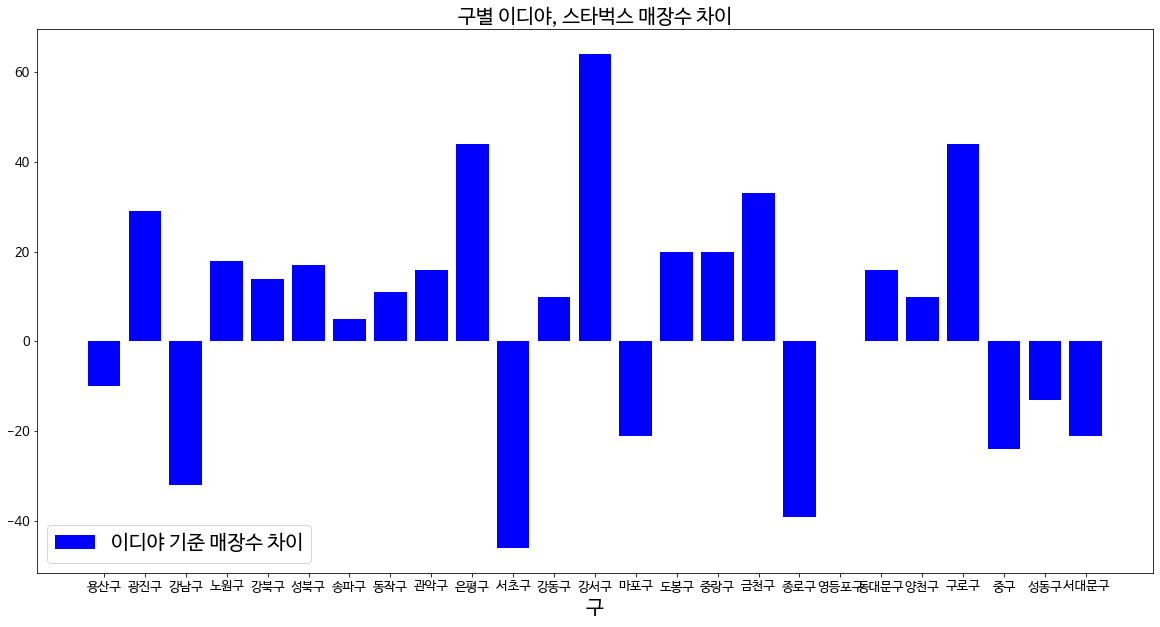

In [26]:
a = sum_data["매장 수 차이"]
y = "ediya"

plt.figure(figsize=(20,10))
plt.bar(sum_data["구"], a, color = 'b', label ="이디야 기준 매장수 차이" )
plt.title("구별 이디야, 스타벅스 매장수 차이", fontsize = 20)
plt.xlabel("구", fontsize = 20)
plt.legend(loc ='lower left', fontsize = 20)
plt.show()
plt.rcParams['font.family']='NanumBarunGothic'
plt.rcParams['font.size']=13